In [1]:
# Load python modules
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow_datasets as tfds
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tqdm import tqdm  # Perform iterature with progress bar
import numpy as np
import PIL.Image
import PIL
import cv2
import os


In [2]:
#Class labelsb
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
image_size = (32, 32)

In [3]:
print('Number of classes:', nb_classes)

Number of classes: 4


In [4]:
class_names_label

{'Glass': 0, 'Metal': 1, 'Paper': 2, 'Textile': 3}

In [5]:
def load_data():
    """
        Load the data from local folder
        
    """
    datasets = ['C:/Mani/Dataset/dataset1/train_ds',
               'C:/Mani/Dataset/dataset1/test_ds']
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [6]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/Dataset/dataset1/train_ds


100%|███████████████████████████████████████████████████████████████████████████████| 270/270 [00:01<00:00, 210.79it/s]


Loading C:/Mani/Dataset/dataset1/test_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 199.37it/s]


In [7]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((1080, 32, 32, 3), (200, 32, 32, 3))

In [8]:
# Shuffle only the training dataset
np.random.seed(321)
train_images, train_labels = shuffle(train_images, train_labels)

In [9]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 1080


In [10]:
#Normalise train and test image dataset from 0,255 to 0,1
train_images = train_images / 255.0 
test_images = test_images / 255.0

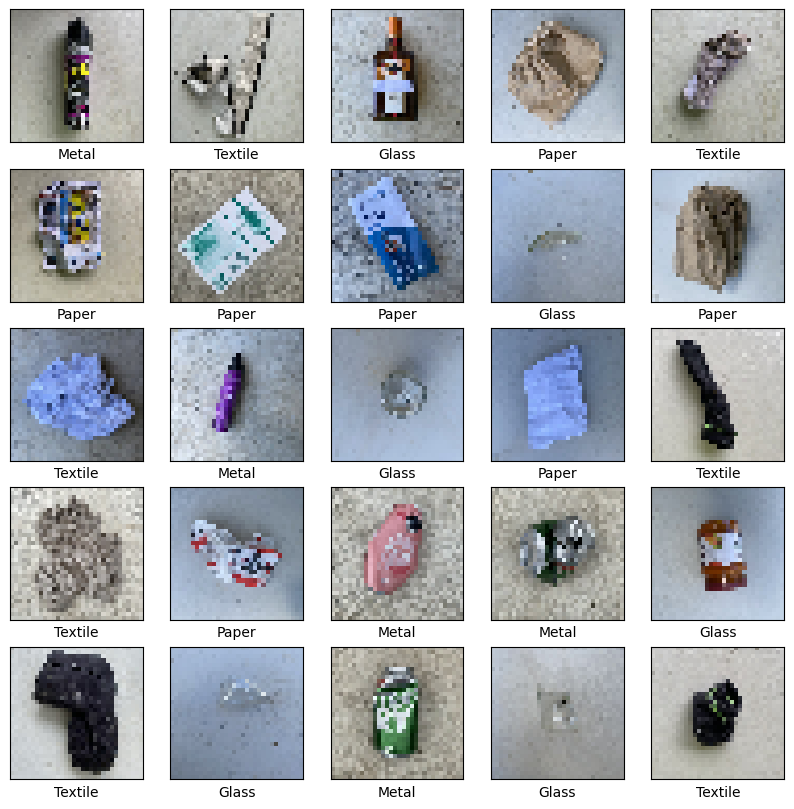

In [11]:
#Display 25 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
#Sequential Model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32, 32 ,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,444 (1.61 MB)

 Trainable params: 421,444 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Sequential Model 2 with image size 128, 128, 3
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
       
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,452 (783.02 KB)

 Trainable params: 200,452 (783.02 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Sequential Model 3 
# Build a deep model 
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,012 (871.14 KB)

 Trainable params: 223,012 (871.14 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Add callbacks to save the model weight with best accuracy during training
# import ModelCheckpoint package
# from tensorflow.keras.callbacks import ModelCheckpoint
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

checkpoint_filepath1 = 'C:/Mani/ModelCheckpoint/model1.keras'
model_checkpoint_callback1 = ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


checkpoint_filepath2 = 'C:/Mani/ModelCheckpoint/model2.keras'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

checkpoint_filepath3 = 'C:/Mani/ModelCheckpoint/model3.keras'
model_checkpoint_callback3 = ModelCheckpoint(
    filepath=checkpoint_filepath3,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [16]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])


model_2.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])


model_3.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
               

In [17]:
# Set number of epochs
epochs = 100
batch_size = 32



In [18]:
#Model 1 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history1 = model_1.fit(train_images, train_labels,
                      batch_size=batch_size, epochs=epochs,
                      validation_split = 0.2, verbose=1,
                      callbacks=[model_checkpoint_callback1])


# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_1_training_time', end_time - start_time )

Time model start: 2024-11-07 09:50:35.294703
Epoch 1/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2566 - loss: 1.4111
Epoch 1: val_accuracy improved from -inf to 0.26389, saving model to C:/Mani/ModelCheckpoint/model1.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2594 - loss: 1.4079 - val_accuracy: 0.2639 - val_loss: 1.3568
Epoch 2/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4254 - loss: 1.3106
Epoch 2: val_accuracy improved from 0.26389 to 0.55556, saving model to C:/Mani/ModelCheckpoint/model1.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4314 - loss: 1.3017 - val_accuracy: 0.5556 - val_loss: 1.1111
Epoch 3/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5415 - loss: 1.0612
Epoch 3: val_accuracy improved from 0.55556 to 0.56944, saving model to C:/Mani/ModelCheckpoint/model1.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5411 - loss: 1.0609 - val_accuracy: 0.5694 - val_loss: 1.0735
Epoch 4/100
26/27 ━━━━━━━

Epoch 24/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9169 - loss: 0.2458
Epoch 24: val_accuracy did not improve from 0.76389
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9166 - loss: 0.2460 - val_accuracy: 0.7130 - val_loss: 0.7257
Epoch 25/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9095 - loss: 0.2463
Epoch 25: val_accuracy did not improve from 0.76389
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9101 - loss: 0.2464 - val_accuracy: 0.7546 - val_loss: 0.6119
Epoch 26/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9410 - loss: 0.2035
Epoch 26: val_accuracy did not improve from 0.76389
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9397 - loss: 0.2052 - val_accuracy: 0.7269 - val_loss: 0.7633
Epoch 27/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9225 - loss: 0.2184
Epoch 27: val_accuracy did not improve from 0.76389
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9233 - loss: 0.2181 - val_accuracy: 0.7454

25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9902 - loss: 0.0567
Epoch 49: val_accuracy improved from 0.77315 to 0.79167, saving model to C:/Mani/ModelCheckpoint/model1.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9900 - loss: 0.0567 - val_accuracy: 0.7917 - val_loss: 0.7119
Epoch 50/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9947 - loss: 0.0320
Epoch 50: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9943 - loss: 0.0327 - val_accuracy: 0.7639 - val_loss: 0.8578
Epoch 51/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9841 - loss: 0.0424
Epoch 51: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9843 - loss: 0.0422 - val_accuracy: 0.7454 - val_loss: 0.9469
Epoch 52/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9915 - loss: 0.0318
Epoch 52: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy:

25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9865 - loss: 0.0426
Epoch 74: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9868 - loss: 0.0417 - val_accuracy: 0.7546 - val_loss: 0.9191
Epoch 75/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9835 - loss: 0.0492
Epoch 75: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9841 - loss: 0.0479 - val_accuracy: 0.7685 - val_loss: 0.8729
Epoch 76/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9925 - loss: 0.0243
Epoch 76: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9919 - loss: 0.0260 - val_accuracy: 0.7593 - val_loss: 0.9124
Epoch 77/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9942 - loss: 0.0322
Epoch 77: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9946 - loss: 0.0310 - val_accuracy: 0.7639 - val_loss: 

25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9952 - loss: 0.0163
Epoch 99: val_accuracy did not improve from 0.79630
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9952 - loss: 0.0166 - val_accuracy: 0.7639 - val_loss: 1.0127
Epoch 100/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9988 - loss: 0.0077
Epoch 100: val_accuracy did not improve from 0.79630
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 0.7593 - val_loss: 1.1161
Time model end: 2024-11-07 09:51:23.553947
Model_1_training_time 0:00:48.259244


In [19]:
# Model 2 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)


history2 = model_2.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback2])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_2_training_time', end_time - start_time )

Time model start: 2024-11-07 09:51:23.561717
Epoch 1/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2535 - loss: 1.3932
Epoch 1: val_accuracy improved from -inf to 0.45370, saving model to C:/Mani/ModelCheckpoint/model2.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2544 - loss: 1.3920 - val_accuracy: 0.4537 - val_loss: 1.3453
Epoch 2/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4281 - loss: 1.3045
Epoch 2: val_accuracy did not improve from 0.45370
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4283 - loss: 1.3010 - val_accuracy: 0.4306 - val_loss: 1.2364
Epoch 3/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4709 - loss: 1.1930
Epoch 3: val_accuracy improved from 0.45370 to 0.52778, saving model to C:/Mani/ModelCheckpoint/model2.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4726 - loss: 1.1885 - val_accuracy: 0.5278 - val_loss: 1.1093
Epoch 4/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5294 - loss: 1.06

Epoch 24/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8477 - loss: 0.4296
Epoch 24: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8461 - loss: 0.4294 - val_accuracy: 0.7315 - val_loss: 0.7195
Epoch 25/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8339 - loss: 0.4079
Epoch 25: val_accuracy improved from 0.75926 to 0.76389, saving model to C:/Mani/ModelCheckpoint/model2.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8356 - loss: 0.4054 - val_accuracy: 0.7639 - val_loss: 0.6928
Epoch 26/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8799 - loss: 0.3528
Epoch 26: val_accuracy did not improve from 0.76389
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8794 - loss: 0.3536 - val_accuracy: 0.7454 - val_loss: 0.6358
Epoch 27/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8990 - loss: 0.2866
Epoch 27: val_accuracy did not improve from 0.76389
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/ste

25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9663 - loss: 0.1276
Epoch 49: val_accuracy improved from 0.76852 to 0.77315, saving model to C:/Mani/ModelCheckpoint/model2.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9656 - loss: 0.1289 - val_accuracy: 0.7731 - val_loss: 0.8350
Epoch 50/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9483 - loss: 0.1233
Epoch 50: val_accuracy did not improve from 0.77315
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9487 - loss: 0.1227 - val_accuracy: 0.7639 - val_loss: 0.7392
Epoch 51/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9718 - loss: 0.0903
Epoch 51: val_accuracy did not improve from 0.77315
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9698 - loss: 0.0964 - val_accuracy: 0.7454 - val_loss: 0.8073
Epoch 52/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9589 - loss: 0.0999
Epoch 52: val_accuracy did not improve from 0.77315
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy:

26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9841 - loss: 0.0498
Epoch 74: val_accuracy did not improve from 0.78241
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9838 - loss: 0.0505 - val_accuracy: 0.7454 - val_loss: 0.9511
Epoch 75/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9823 - loss: 0.0525
Epoch 75: val_accuracy did not improve from 0.78241
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9821 - loss: 0.0522 - val_accuracy: 0.7731 - val_loss: 0.9563
Epoch 76/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9817 - loss: 0.0363
Epoch 76: val_accuracy did not improve from 0.78241
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9823 - loss: 0.0364 - val_accuracy: 0.7639 - val_loss: 0.9953
Epoch 77/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9793 - loss: 0.0675
Epoch 77: val_accuracy did not improve from 0.78241
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9791 - loss: 0.0681 - val_accuracy: 0.7593 - val_loss: 

25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9873 - loss: 0.0347
Epoch 99: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9874 - loss: 0.0348 - val_accuracy: 0.7824 - val_loss: 1.0981
Epoch 100/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9897 - loss: 0.0427
Epoch 100: val_accuracy did not improve from 0.79167
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9898 - loss: 0.0422 - val_accuracy: 0.7824 - val_loss: 1.2064
Time model end: 2024-11-07 09:52:24.468789
Model_2_training_time 0:01:00.907072


In [20]:
#Model 3 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history3 = model_3.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback3])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_3_training_time', end_time - start_time )

Time model start: 2024-11-07 09:52:24.474263
Epoch 1/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2226 - loss: 1.3966
Epoch 1: val_accuracy improved from -inf to 0.23148, saving model to C:/Mani/ModelCheckpoint/model3.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2238 - loss: 1.3961 - val_accuracy: 0.2315 - val_loss: 1.3861
Epoch 2/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2494 - loss: 1.3854
Epoch 2: val_accuracy did not improve from 0.23148
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2486 - loss: 1.3850 - val_accuracy: 0.2315 - val_loss: 1.3678
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3046 - loss: 1.3433
Epoch 3: val_accuracy improved from 0.23148 to 0.43981, saving model to C:/Mani/ModelCheckpoint/model3.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3055 - loss: 1.3428 - val_accuracy: 0.4398 - val_loss: 1.2858
Epoch 4/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4050 - loss: 1.29

Epoch 24/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7872 - loss: 0.5270
Epoch 24: val_accuracy improved from 0.68519 to 0.69907, saving model to C:/Mani/ModelCheckpoint/model3.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7872 - loss: 0.5276 - val_accuracy: 0.6991 - val_loss: 0.8428
Epoch 25/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8199 - loss: 0.5273
Epoch 25: val_accuracy did not improve from 0.69907
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8197 - loss: 0.5257 - val_accuracy: 0.6898 - val_loss: 0.7792
Epoch 26/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8081 - loss: 0.4641
Epoch 26: val_accuracy did not improve from 0.69907
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8099 - loss: 0.4622 - val_accuracy: 0.6806 - val_loss: 0.9899
Epoch 27/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8081 - loss: 0.5233
Epoch 27: val_accuracy did not improve from 0.69907
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/ste

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9314 - loss: 0.1690 - val_accuracy: 0.7269 - val_loss: 1.0062
Epoch 49/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9239 - loss: 0.2211
Epoch 49: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9240 - loss: 0.2190 - val_accuracy: 0.7176 - val_loss: 1.0562
Epoch 50/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9419 - loss: 0.1617
Epoch 50: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9425 - loss: 0.1609 - val_accuracy: 0.7454 - val_loss: 1.0556
Epoch 51/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9599 - loss: 0.1062
Epoch 51: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9580 - loss: 0.1097 - val_accuracy: 0.7269 - val_loss: 1.1970
Epoch 52/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9492 - loss: 0.1609
Epoch 52: val_accuracy did not i

Epoch 74/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9661 - loss: 0.0974
Epoch 74: val_accuracy did not improve from 0.76852
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9659 - loss: 0.0982 - val_accuracy: 0.7083 - val_loss: 1.2220
Epoch 75/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9504 - loss: 0.1401
Epoch 75: val_accuracy did not improve from 0.76852
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9509 - loss: 0.1384 - val_accuracy: 0.7454 - val_loss: 1.2283
Epoch 76/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9774 - loss: 0.0773
Epoch 76: val_accuracy did not improve from 0.76852
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9774 - loss: 0.0771 - val_accuracy: 0.7269 - val_loss: 1.0595
Epoch 77/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9758 - loss: 0.0616
Epoch 77: val_accuracy did not improve from 0.76852
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9756 - loss: 0.0620 - val_accuracy: 0.7361

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9932 - loss: 0.0177
Epoch 99: val_accuracy did not improve from 0.78241
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9932 - loss: 0.0178 - val_accuracy: 0.7500 - val_loss: 1.4018
Epoch 100/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9897 - loss: 0.0348
Epoch 100: val_accuracy did not improve from 0.78241
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9894 - loss: 0.0351 - val_accuracy: 0.7593 - val_loss: 1.4905
Time model end: 2024-11-07 09:53:47.772276
Model_3_training_time 0:01:23.298013


Text(0.5, 1.0, 'Model_1 Accuracy (Exp:1.1)')

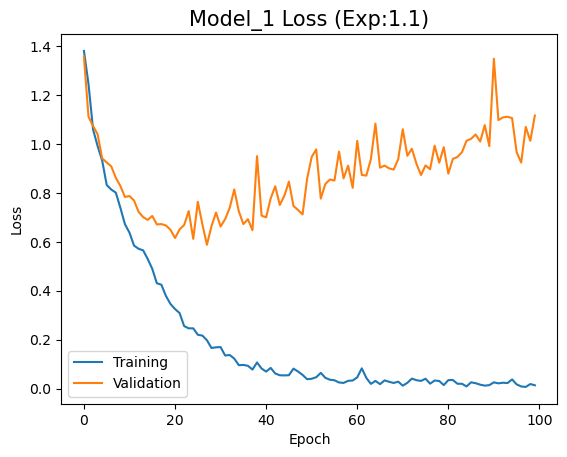

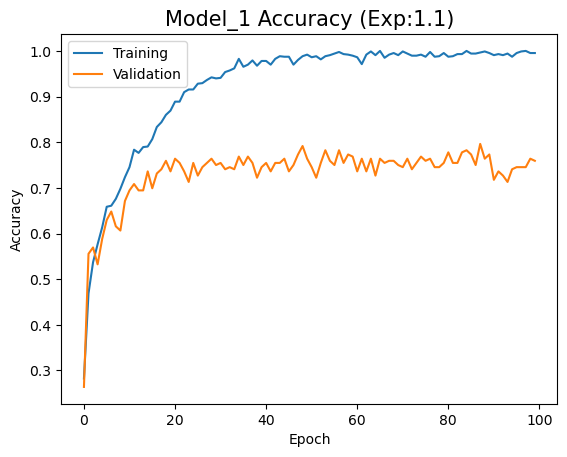

In [21]:

#Plot the training and validation loss
plt.figure()
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_1 Loss (Exp:1.1)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_1 Accuracy (Exp:1.1)', fontsize = 15)


Text(0.5, 1.0, 'Model_2 Accuracy (Exp:1.1)')

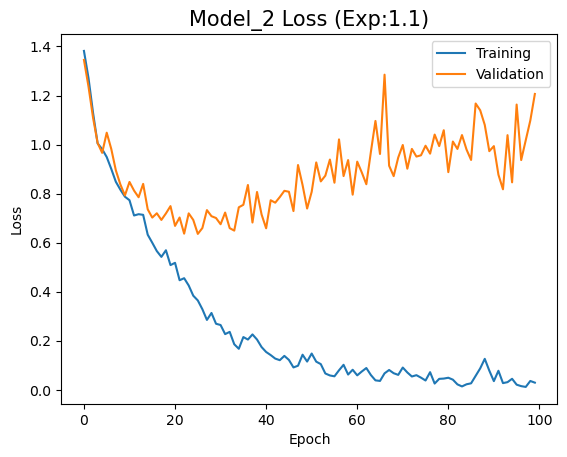

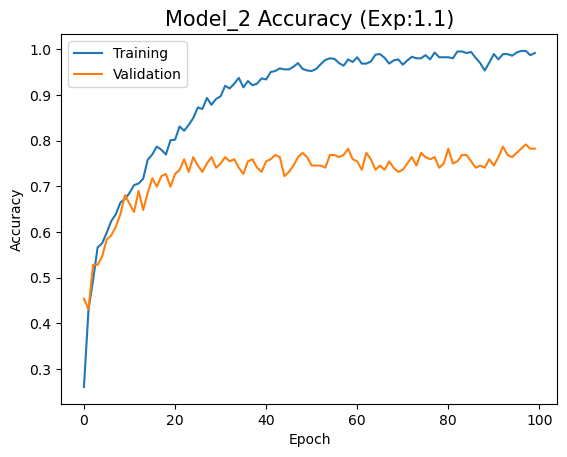

In [22]:
#Plot the training and validation loss
plt.figure()
plt.plot(history2.history['loss'], label='Training')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_2 Loss (Exp:1.1)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_2 Accuracy (Exp:1.1)', fontsize = 15)

Text(0.5, 1.0, 'Model_3 Accuracy (Exp:1.1)')

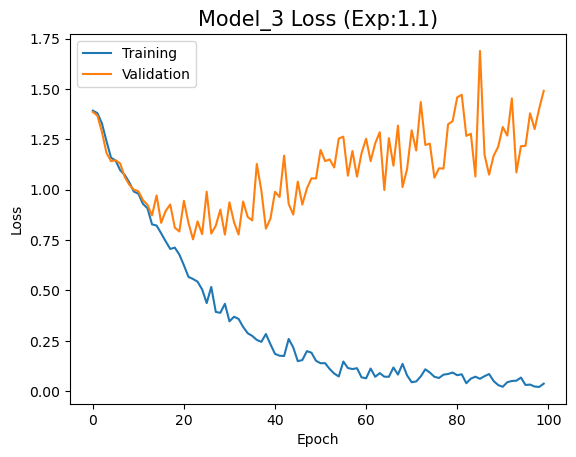

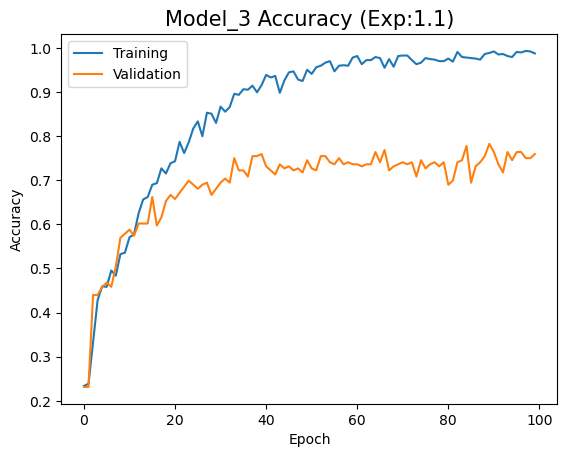

In [23]:
#Plot the training and validation loss
plt.figure()
plt.plot(history3.history['loss'], label='Training')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_3 Loss (Exp:1.1)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_3 Accuracy (Exp:1.1)', fontsize = 15)

In [24]:
# Evaluate the test result for model 1, 2, 3
Test_result1 = model_1.evaluate(test_images, test_labels, batch_size = 64)

Test_result2 = model_2.evaluate(test_images, test_labels, batch_size = 64)

Test_result3 = model_3.evaluate(test_images, test_labels, batch_size = 64)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7151 - loss: 1.3246 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7583 - loss: 1.0863
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7919 - loss: 1.0717


In [25]:
predictions1 = model_1.predict(test_images)     # Vector of probabilities
pred_label1 = np.argmax(predictions1, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [26]:
predictions2 = model_2.predict(test_images)     # Vector of probabilities
pred_label2 = np.argmax(predictions2, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [27]:
predictions3 = model_3.predict(test_images)     # Vector of probabilities
pred_label3 = np.argmax(predictions3, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


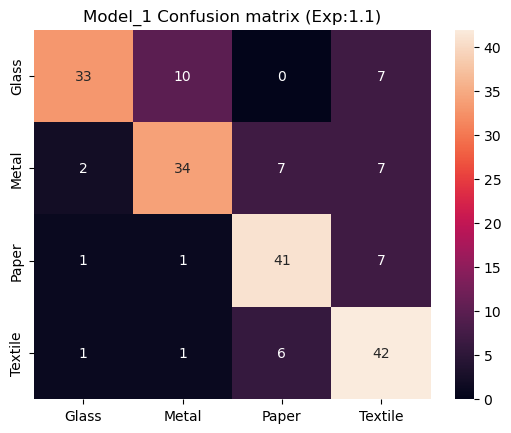

In [28]:
CM = confusion_matrix(test_labels, pred_label1)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_1 Confusion matrix (Exp:1.1)')
plt.show()

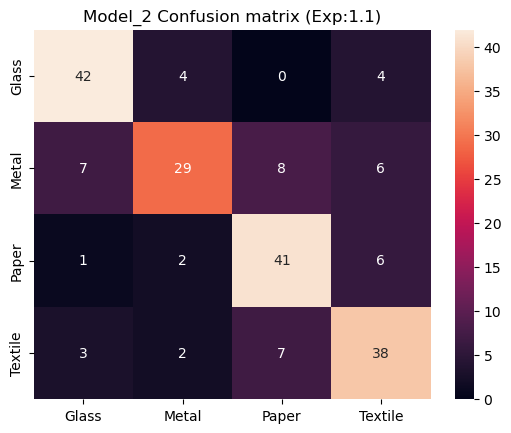

In [29]:
CM = confusion_matrix(test_labels, pred_label2)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_2 Confusion matrix (Exp:1.1)')
plt.show()


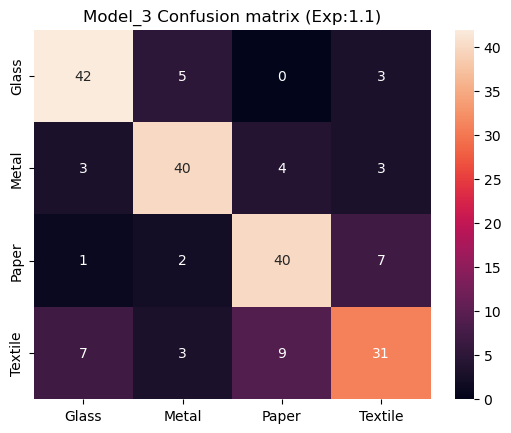

In [30]:
CM = confusion_matrix(test_labels, pred_label3)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_3 Confusion matrix (Exp:1.1)')
plt.show()
